In [ ]:

import imutils
import cv2
 
# load the input image and show its dimensions, keeping in mind that
# images are represented as a multi-dimensional NumPy array with
# shape no. rows (height) x no. columns (width) x no. channels (depth)
image = cv2.imread("beautiful.jpg")
(h, w, d) = image.shape
print("width={}, height={}, depth={}".format(w, h, d))
 
# display the image to our screen -- we will need to click the window
# open by OpenCV and press a key on our keyboard to continue execution
cv2.imshow("Image", image)
cv2.waitKey(0)

width=305, height=165, depth=3


In [ ]:
import imutils
import cv2
# access the RGB pixel located at x=50, y=100, keepind in mind that
# OpenCV stores images in BGR order rather than RGB
image = cv2.imread("beautiful.jpg")
(B, G, R) = image[100, 50]
print("R={}, G={}, B={}".format(R, G, B))
cv2.imshow("Image", image[60:200, 20:320])
cv2.waitKey(0)

In [ ]:
import imutils
import cv2
# extract a 100x100 pixel square ROI (Region of Interest) from the
# input image starting at x=320,y=60 at ending at x=420,y=160
image = cv2.imread("beautiful.jpg")
roi = image[60:200, 20:320]
cv2.imshow("ROI", roi)
cv2.waitKey(0)

In [ ]:
Resizing images


In [ ]:
# resize the image to 200x200px, ignoring aspect ratio
import cv2
image = cv2.imread("beautiful.jpg")
resized = cv2.resize(image, (200, 200))
cv2.imshow("Fixed Resizing", resized)
cv2.waitKey(0)

In [1]:
# fixed resizing and distort aspect ratio so let's resize the width
# to be 300px but compute the new height based on the aspect ratio
import cv2
image = cv2.imread("beautiful.jpg")
r = 300.0 / w
dim = (300, int(h * r))
resized = cv2.resize(image, dim)
cv2.imshow("Aspect Ratio Resize", resized)
cv2.waitKey(0)

NameError: name 'w' is not defined

In [44]:

# manually computing the aspect ratio can be a pain so let's use the
# imutils library instead
resized = imutils.resize(image, width=300)
cv2.imshow("Imutils Resize", resized)
cv2.waitKey(0)

-1

In [19]:
# let's rotate an image 45 degrees clockwise using OpenCV by first
# computing the image center, then constructing the rotation matrix,
# and then finally applying the affine warp
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
cv2.imshow("OpenCV Rotation", rotated)
cv2.waitKey(0)

-1

In [45]:
# rotation can also be easily accomplished via imutils with less code
rotated = imutils.rotate(image, -45)
cv2.imshow("Imutils Rotation", rotated)
cv2.waitKey(0)

-1

In [24]:
# OpenCV doesn't "care" if our rotated image is clipped after rotation
# so we can instead use another imutils convenience function to help
# us out
rotated = imutils.rotate_bound(image, 45)
cv2.imshow("Imutils Bound Rotation", rotated)
cv2.waitKey(0)

-1

In [46]:
# apply a Gaussian blur with a 11x11 kernel to the image to smooth it,
# useful when reducing high frequency noise
blurred = cv2.GaussianBlur(image, (11, 11), 0)
cv2.imshow("Blurred", blurred)
cv2.waitKey(0)

-1

In [55]:
# draw a 2px thick red rectangle surrounding the face
output = image.copy()
cv2.rectangle(output, (200, 60), (10, 160), (0, 200, 200), 2)
cv2.imshow("Rectangle", output)
cv2.waitKey(0)

-1

In [30]:
# draw a blue 20px (filled in) circle on the image centered at
# x=300,y=150
output = image.copy()
cv2.circle(output, (300, 150), 20, (255, 0, 0), -1)
cv2.imshow("Circle", output)
cv2.waitKey(0)

-1

In [56]:
# draw a 5px thick red line from x=60,y=20 to x=400,y=200
output = image.copy()
cv2.line(output, (60, 20), (400, 200), (0, 0, 255), 2)
cv2.imshow("Line", output)
cv2.waitKey(0)

-1

In [58]:
import cv2
 
# load the input image and show its dimensions, keeping in mind that
# images are represented as a multi-dimensional NumPy array with
# shape no. rows (height) x no. columns (width) x no. channels (depth)
image = cv2.imread("beautiful.jpg")

output = image.copy()
cv2.putText(output, "Movie name: Beautiful minds !!!", (10, 25), 
	cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
cv2.imshow("Text", output)
cv2.waitKey(0)

-1

In [60]:

# load the input image (whose path was supplied via command line
# argument) and display the image to our screen
image = cv2.imread("beautiful.jpg")
cv2.imshow("Image", image)
cv2.waitKey(0)
 
# convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray", gray)
cv2.waitKey(0)

-1

In [ ]:
canny edge detection 

In [65]:
# applying edge detection we can find the outlines of objects in
# images
edged = cv2.Canny(gray, 30, 150)
cv2.imshow("Edged", edged)
cv2.waitKey(0)

-1

In [71]:
# threshold the image by setting all pixel values less than 225
# to 255 (white; foreground) and all pixel values >= 225 to 255
# (black; background), thereby segmenting the image
thresh = cv2.threshold(gray, 50, 50, cv2.THRESH_BINARY_INV)[1]
cv2.imshow("Thresh", thresh)
cv2.waitKey(0)

-1

In [1]:
import cv2
import numpy as np
#$ pip install -U scikit-image
from skimage.exposure import rescale_intensity


def convolve(image, kernel):
	# grab the spatial dimensions of the image, along with
	# the spatial dimensions of the kernel
	(iH, iW) = image.shape[:2]
	(kH, kW) = kernel.shape[:2]
 
	# allocate memory for the output image, taking care to
	# "pad" the borders of the input image so the spatial
	# size (i.e., width and height) are not reduced
	pad = (kW - 1) // 2
	image = cv2.copyMakeBorder(image, pad, pad, pad, pad,
		cv2.BORDER_REPLICATE)
	output = np.zeros((iH, iW), dtype="float32")
    	# loop over the input image, "sliding" the kernel across
	# each (x, y)-coordinate from left-to-right and top to
	# bottom
	for y in np.arange(pad, iH + pad):
		for x in np.arange(pad, iW + pad):
			# extract the ROI of the image by extracting the
			# *center* region of the current (x, y)-coordinates
			# dimensions
			roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
 
			# perform the actual convolution by taking the
			# element-wise multiplicate between the ROI and
			# the kernel, then summing the matrix
			k = (roi * kernel).sum()
 
			# store the convolved value in the output (x,y)-
			# coordinate of the output image
			output[y - pad, x - pad] = k
            	# rescale the output image to be in the range [0, 255]
	output = rescale_intensity(output, in_range=(0, 255))
	output = (output * 255).astype("uint8")
 
	# return the output image
	return output





# construct average blurring kernels used to smooth an image
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))
 
# construct a sharpening filter
sharpen = np.array((
	[0, -1, 0],
	[-1, 5, -1],
	[0, -1, 0]), dtype="int")

# construct the Laplacian kernel used to detect edge-like
# regions of an image
laplacian = np.array((
	[0, 1, 0],
	[1, -4, 1],
	[0, 1, 0]), dtype="int")
 
# construct the Sobel x-axis kernel
sobelX = np.array((
	[-1, 0, 1],
	[-2, 0, 2],
	[-1, 0, 1]), dtype="int")
 
# construct the Sobel y-axis kernel
sobelY = np.array((
	[-1, -2, -1],
	[0, 0, 0],
	[1, 2, 1]), dtype="int")
# construct the kernel bank, a list of kernels we're going
# to apply using both our custom `convole` function and
# OpenCV's `filter2D` function
kernelBank = (
	("small_blur", smallBlur),
	("large_blur", largeBlur),
	("sharpen", sharpen),
	("laplacian", laplacian),
	("sobel_x", sobelX),
	("sobel_y", sobelY)
)

# load the input image and convert it to grayscale
image = cv2.imread("beautiful.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow("original", gray)
cv2.waitKey(0)
 
# loop over the kernels
for (kernelName, kernel) in kernelBank:
	# apply the kernel to the grayscale image using both
	# our custom `convole` function and OpenCV's `filter2D`
	# function
	print("[INFO] applying {} kernel".format(kernelName))
	convoleOutput = convolve(gray, kernel)
	opencvOutput = cv2.filter2D(gray, -1, kernel)
 
	# show the output images
	cv2.imshow("original", gray)
	cv2.imshow("{} - convole".format(kernelName), convoleOutput)
	cv2.imshow("{} - opencv".format(kernelName), opencvOutput)
	cv2.waitKey(0)
	cv2.destroyAllWindows()

[INFO] applying small_blur kernel
[INFO] applying large_blur kernel
[INFO] applying sharpen kernel
[INFO] applying laplacian kernel
[INFO] applying sobel_x kernel
[INFO] applying sobel_y kernel


In [ ]:
Edge detection 

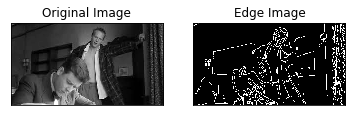

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('beautiful.jpg',0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
import cv2
import numpy as np
original = cv2.imread("we.jpg")
duplicate = cv2.imread("we.jpg")
# 1) Check if 2 images are equals
if original.shape == duplicate.shape:
    print("The images have same size and channels")
    difference = cv2.subtract(original, duplicate)
    b, g, r = cv2.split(difference)

    if cv2.countNonZero(b) == 0 and cv2.countNonZero(g) == 0 and cv2.countNonZero(r) == 0:
        print("The images are completely Equal")
        cv2.imshow("Original", original)
        cv2.imshow("Duplicate", duplicate)
        cv2.waitKey(0)
        cv2.destroyAllWindows()